Take in athlete PR
Convert to percentage of world record
Create other expected perfomances for different races
Plot on graph
Take GAP of Segment
Plot gap on graph, see if over or under curve

In [76]:
import datetime
WR_800 = datetime.timedelta(minutes=1,seconds=40)
WR_MILE = datetime.timedelta(minutes=3,seconds=43)
WR_2K = datetime.timedelta(minutes=4,seconds=44) 
WR_3K = datetime.timedelta(minutes=7,seconds=20)
WR_5K = datetime.timedelta(minutes=12,seconds=35)
WR_10K = datetime.timedelta(minutes=26,seconds=24)
WR_10M = datetime.timedelta(minutes=44,seconds=24)
WR_MARATHON = datetime.timedelta(hours=2,minutes=1,seconds=39)

def pr_to_wr_percentage(athlete_pr:datetime.time):
    # assume 5k for now
    # TODO allow for other PR entry
    percentage_of_wr =  WR_5K.total_seconds() / athlete_pr.total_seconds()
    return percentage_of_wr

def get_equivalent_time_all_records(wr_percentage):
    rigels_constant = 1.06 # helps with accuracy
    t_0 = 0
    t_800 = WR_800.total_seconds() + (WR_800.total_seconds() * (1-wr_percentage)) * rigels_constant
    t_mile = WR_MILE.total_seconds() + (WR_MILE.total_seconds() * (1-wr_percentage))* rigels_constant
    t_2k = WR_2K.total_seconds() + (WR_2K.total_seconds() * (1-wr_percentage))* rigels_constant
    t_3k = WR_3K.total_seconds() + (WR_3K.total_seconds() * (1-wr_percentage))* rigels_constant
    t_5k = WR_5K.total_seconds() + (WR_5K.total_seconds() * (1-wr_percentage))* rigels_constant
    t_10k = WR_10K.total_seconds() + (WR_10K.total_seconds() * (1-wr_percentage))* rigels_constant
    t_10m = WR_10M.total_seconds() + (WR_10M.total_seconds() * (1-wr_percentage))* rigels_constant
    t_mara = WR_MARATHON.total_seconds() + (WR_MARATHON.total_seconds() * (1-wr_percentage))* rigels_constant
    return t_0,t_800,t_mile,t_2k,t_3k,t_5k,t_10k,t_10m,t_mara


In [79]:
pr = datetime.timedelta(minutes=14,seconds=46)
percentage = pr_to_wr_percentage(pr)

In [80]:
print(get_equivalent_time_all_records(percentage))

(0, 115.6726862302483, 257.95009029345374, 328.5104288939052, 508.95981941309253, 873.3287810383747, 1832.2553498871332, 3081.520361173815, 8442.949367945825)


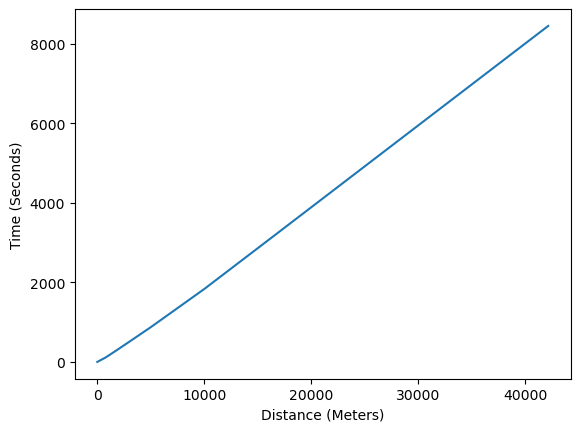

In [82]:
from matplotlib import pyplot as plt
def graph_distance_v_time(equivalent_event_times):
    meters = [0,800,1609,2000,3000,5000,10000,16093.4,42164.81]
    time = equivalent_event_times
    plt.xlabel("Distance (Meters)")
    plt.ylabel("Time (Seconds)")
    plt.plot(meters,time)
    plt.show()
    return meters,time
    

plot_data = graph_distance_v_time(get_equivalent_time_all_records(percentage))


In [83]:
# Gap is 10s per 44ft per 1609.34m
# So GAP pace change = -10 * ((elevation gain/drop/#miles) * (#miles)/44) 
# In meteres = -10 * ((elevation gain/drop/(distance/1609.44)) * ((distance/1609.4)/44) 
# Break down a run into 10m stretches
# GAP is 10/160.09 seconds per 44/160.09 ft gain/drop per 10m
# So for a 10m run in 

In [84]:
# Need to determine whether a point is above or below graph line
def graph_segment_on_athlete_curve(plot_data,segment_data):
    plt.xlabel("Distance (Meters)")
    plt.ylabel("Time (Seconds)")
    plot_x_nearest_to_segment = min(plot_data[0], key=lambda x:abs(x-segment_data[0]))
    plot_y_nearest_to_segment = min(plot_data[1], key=lambda x:abs(x-segment_data[1]))

    # plotting a random point for comparison
    # TODO find a way to check if above or below line instantly
    plt.axis([segment_data[0]-100,segment_data[0]+100,
    min(plot_x_nearest_to_segment,segment_data[1]-100),max(plot_y_nearest_to_segment,segment_data[1]+100)])
    plt.scatter([segment_data[0]],[segment_data[1]],color="red",label="Segment")
    plt.plot(plot_data[0],plot_data[1],label="Athlete")
    plt.legend()
    plt.show()

def calc_above_or_below_plt_line(plot_data,segment_data):
    # Calculate cross product
    xA = segment_data[0]
    yA = segment_data[1]
    x1 = 0
    x2 = 0
    y1 = 0
    y2 = 0
    for distance_index in range(len(plot_data[0])):
        if plot_data[0][distance_index] > xA:
            x1 = plot_data[0][distance_index]
            y1 = plot_data[1][distance_index]
            x2 = plot_data[0][distance_index-1]
            y2 = plot_data[1][distance_index-1]
            break
    v1 = (x2-x1, y2-y1)   
    v2 = (x2-xA, y2-yA)   
    cross_product = v1[0]*v2[1] - v1[1]*v2[0] 
    if cross_product > 0:
        print('Athlete is faster than segment')
    elif cross_product < 0:
        print('Athlete is slower than segment')
    else:
        print('Athlete is exactly as fast as segment')
        


Athlete is faster than segment


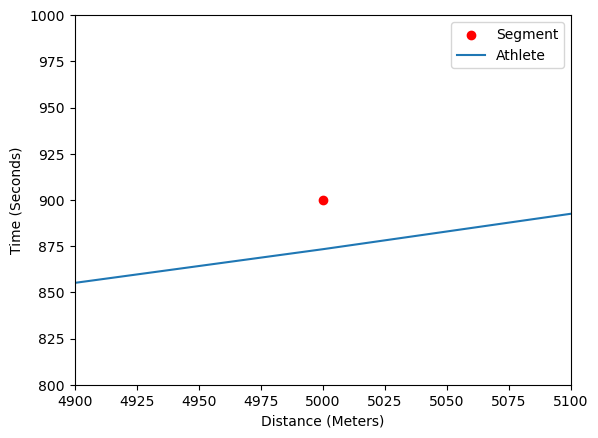

In [88]:
segment_data = (5000,900)
calc_above_or_below_plt_line(plot_data,segment_data)
graph_segment_on_athlete_curve(plot_data,segment_data)